In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle
import dpp.little_helper_dan as lh

c:\Users\avtma\Documents\Python\DPP_Callcenter\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#dataset_link = "shriyashjagtap/esg-and-financial-performance-dataset" # replace with your dataset link from Kaggle 
#dataset_link = "donovanbangs/call-centre-queue-simulation" # replace with your dataset link from Kaggle 
dataset_link = "abdelfatahfouad/call-center-performance-report" # replace with your dataset link from Kaggle 

destination = "../data/raw"
destination = "../data/raw"

dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

100%|██████████| 1.19M/1.19M [00:00<00:00, 2.70MB/s]

Extracting files...
Loading dataset from C:\Users\avtma\.cache\kagglehub\datasets\abdelfatahfouad\call-center-performance-report\versions\2 to ../data/raw\call-center-performance-report
Moving file: C:\Users\avtma\.cache\kagglehub\datasets\abdelfatahfouad\call-center-performance-report\versions\2\Auxs.xlsx to c:\Users\avtma\Documents\Python\DPP_Callcenter\notebooks\../data/raw\call-center-performance-report
Moving file: C:\Users\avtma\.cache\kagglehub\datasets\abdelfatahfouad\call-center-performance-report\versions\2\Call Center - Dataset.csv to c:\Users\avtma\Documents\Python\DPP_Callcenter\notebooks\../data/raw\call-center-performance-report
Moving file: C:\Users\avtma\.cache\kagglehub\datasets\abdelfatahfouad\call-center-performance-report\versions\2\Login ID.xlsx to c:\Users\avtma\Documents\Python\DPP_Callcenter\notebooks\../data/raw\call-center-performance-report
Files moved to '../data/raw\call-center-performance-report' directory.


In [9]:
files

['simulated_call_centre.csv']

In [13]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,call_id,date,daily_caller,call_started,call_answered,call_ended,wait_length,service_length,meets_standard
0,1,2021-01-01,1,8:00:00 AM,8:00:00 AM,8:14:22 AM,0,863,True
1,2,2021-01-01,2,8:02:42 AM,8:02:42 AM,8:07:31 AM,0,289,True
2,3,2021-01-01,3,8:08:24 AM,8:08:24 AM,8:10:13 AM,0,108,True
3,4,2021-01-01,4,8:09:37 AM,8:09:37 AM,8:13:45 AM,0,247,True
4,5,2021-01-01,5,8:11:10 AM,8:11:10 AM,8:15:28 AM,0,258,True


In [14]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(51708, 9)

'Description'

,call_id,daily_caller,wait_length,service_length
count,51708.00,51708.00,51708.00,51708.00
mean,25854.50,104.19,17.03,299.10
std,14926.96,64.95,64.06,299.87
min,1.00,1.00,0.00,0.00
25%,12927.75,50.00,0.00,86.00
50%,25854.50,100.00,0.00,208.00
75%,38781.25,150.00,0.00,414.00
max,51708.00,297.00,983.00,3110.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
call_id,int64,0,51708,"[13697, 42503, 45714]"
date,object,0,261,"[2021-05-25, 2021-03-15, 2021-06-15]"
daily_caller,int64,0,297,"[144, 9, 95]"
call_started,object,0,27403,"[3:39:55 PM, 2:23:29 PM, 3:54:37 PM]"
call_answered,object,0,27366,"[4:43:00 PM, 1:09:21 PM, 9:10:55 AM]"
call_ended,object,0,27486,"[8:20:01 AM, 9:11:08 AM, 2:48:52 PM]"
wait_length,int64,0,575,"[0, 143, 0]"
service_length,int64,0,1719,"[43, 304, 24]"
meets_standard,bool,0,2,"[True, True, True]"


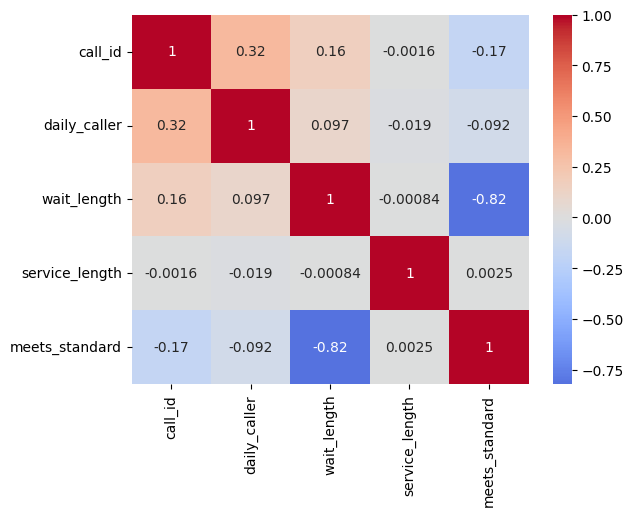

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

,dtype,total,missing_n,missing_%,uniques_n,uniques
call_id,int64,51708,0,0.0,51708,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
date,object,51708,0,0.0,261,"[2021-01-01, 2021-01-04, 2021-01-05, 2021-01-0..."
daily_caller,int64,51708,0,0.0,297,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
call_started,object,51708,0,0.0,27403,"[8:00:00 AM, 8:02:42 AM, 8:08:24 AM, 8:09:37 A..."
call_answered,object,51708,0,0.0,27366,"[8:00:00 AM, 8:02:42 AM, 8:08:24 AM, 8:09:37 A..."
call_ended,object,51708,0,0.0,27486,"[8:14:22 AM, 8:07:31 AM, 8:10:13 AM, 8:13:45 A..."
wait_length,int64,51708,0,0.0,575,"[0, 72, 67, 34, 149, 68, 148, 35, 166, 146, 56..."
service_length,int64,51708,0,0.0,1719,"[863, 289, 108, 247, 258, 340, 656, 341, 23, 5..."
meets_standard,bool,51708,0,0.0,2,"[True, False]"


ValueError: Length of EnumType vectors must match length of `data` when both are used, but `data` has length 51708 and the vector passed to `y` has length 7.

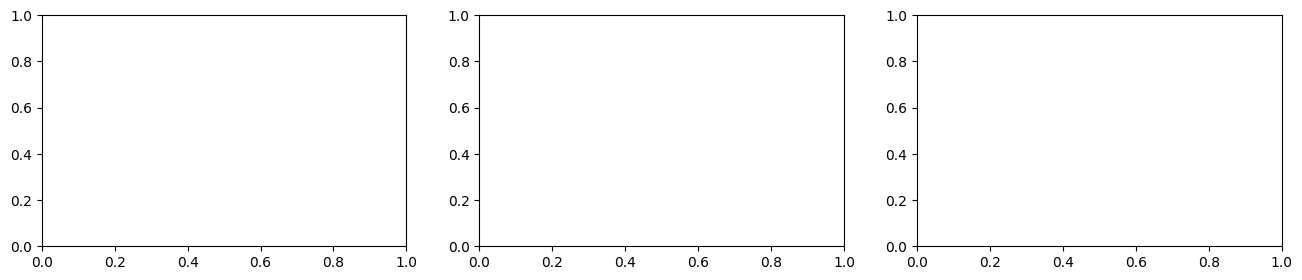

In [23]:
from calendar import Day


lh.overview(df)

lh.numplots(Day, df, key="call_answered")